In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity

%matplotlib inline

In [29]:
#  Import, trancate and plot a histogram of the SPX's daily percent change
SPX = pd.read_csv('SPX.csv')

SPX = SPX[ SPX['Date'] >= '1990-01-01']
SPX['pct'] = SPX['Close'].pct_change()
pct = SPX['pct'].to_numpy()
pct = np.delete(pct, 0)

Text(0, 0.5, 'Normalized Count')

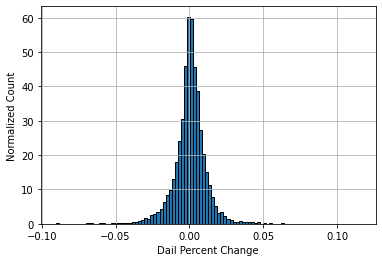

In [30]:
count, bins, patches = plt.hist(pct, bins = 100, density = True, edgecolor = 'Black')
plt.grid(True)
plt.xlabel('Dail Percent Change')
plt.ylabel('Normalized Count')

In [31]:
#  Calcuate the density function by calling gaussian_kde.  This will return an object
scipy_kernel = gaussian_kde(pct)
print( type(scipy_kernel))

#  We calculate the bandwidth for later use
bw = scipy_kernel.factor * np.std(pct)
print(bw)

<class 'scipy.stats.kde.gaussian_kde'>
0.001841222957545444


Text(0, 0.5, 'Normalized Count')

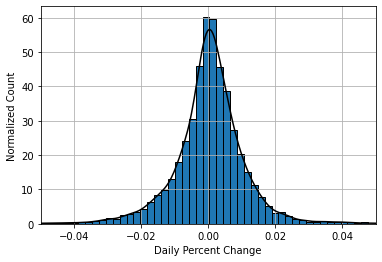

In [32]:
#  Generate a plot of the resulting function.  the object has a member function evaluate which we can use to evaluate the function at any allowed point.
u = np.linspace(-0.1, 0.1, 500)
v = scipy_kernel.evaluate(u)

#  Plot the orginal histogram along with our estimated density
count, bins, patches = plt.hist(pct, bins = 100, density = True, edgecolor = 'Black')
plt.plot(u, v, 'k')
plt.xlim([-0.05, 0.05])
plt.grid(True)
plt.xlabel('Daily Percent Change')
plt.ylabel('Normalized Count')

In [33]:
#  We can now sample from our distribution with the member function sample
sample = scipy_kernel.resample(5000)

Text(0.5, 1.0, 'Samled Data (Scipy)')

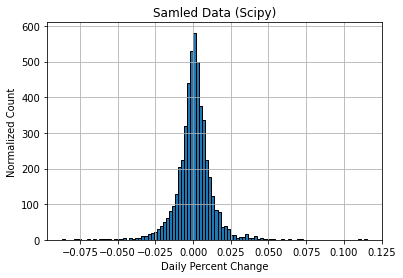

In [34]:
c, b, p = plt.hist(sample[0], bins = 100, edgecolor = 'black')
plt.grid(True)
plt.xlabel('Daily Percent Change')
plt.ylabel('Normalized Count')
plt.title('Samled Data (Scipy)')

Text(0.5, 1.0, 'Sampled Data (skitlearn)')

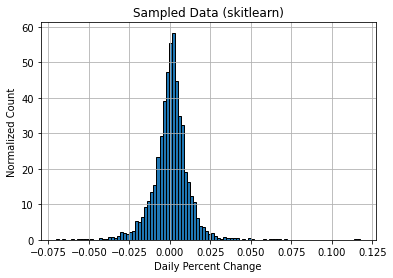

In [35]:
#  The scjikitlearn package requires our data to be 2-dimensional
pct.shape = (pct.size, 1)

#  Use scikitlearn to create a density estimate.  This function does not automatically find the bandwidth so we use the value from above
scikit_kernel = KernelDensity(bandwidth = bw, kernel = 'gaussian').fit(pct)

#  Sample from the density function and plot the results
sample = scikit_kernel.sample(5000)
c, b, p = plt.hist(sample, bins = 100, density = True, edgecolor = 'black')
plt.grid(True)
plt.xlabel('Daily Percent Change')
plt.ylabel('Normalized Count')
plt.title('Sampled Data (skitlearn)')